# Linear regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np


def plot_lin_reg(x, y, slope, intercept):
    # Plot the data and the linear regression line
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


# Generate some random data
np.random.seed(0)
x = np.random.rand(50)
y = 2 * x + np.random.rand(50)

## Analytical solution

Analytical solution: slope: 1.906258736293441, intercept: 0.4580520907666923


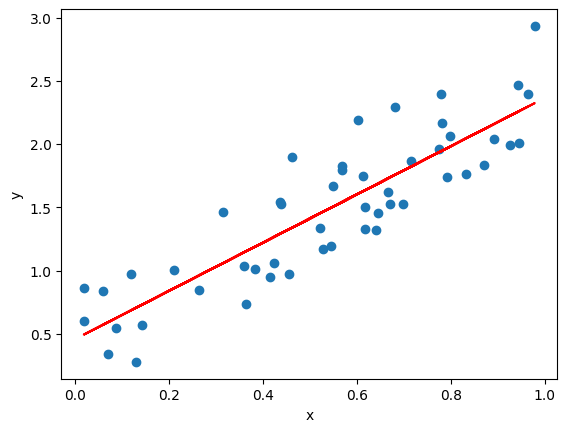

In [26]:
def analytical_lin_reg(x, y):
    r = np.corrcoef(x, y)[0, 1]
    sd_y = np.std(y)
    sd_x = np.std(x)
    slope = r * (sd_y / sd_x)
    intercept = np.mean(y) - slope * np.mean(x)
    return slope, intercept

slope, intercept = analytical_lin_reg(x, y)
print(f"Analytical solution: slope: {slope}, intercept: {intercept}")
plot_lin_reg(x, y, slope, intercept)

## Gradient descent

Iteration: 0, slope: 0, intercept: 0
Iteration: 250, slope: 1.6068704477690314, intercept: 0.6287980966144482
Iteration: 500, slope: 1.834048523919531, intercept: 0.4992347482615197
Iteration: 750, slope: 1.888842174019796, intercept: 0.46798503924133195
Iteration: 1000, slope: 1.9020579919463534, intercept: 0.4604478435277231


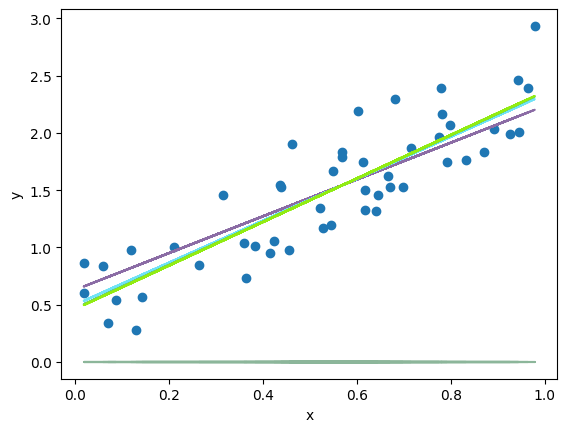

Gradient descent: slope: 1.9020818206259027, intercept: 0.46043425364457263


In [34]:
def gradient_descent_lin_reg(x, y, lr):
    np.random.seed(0)
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')

    # Initialize the slope and intercept to 0
    slope = 0
    intercept = 0

    # Perform gradient descent
    for i in range(0, 1001):
        if i % 250 == 0:
            print("Iteration: {}, slope: {}, intercept: {}".format(i, slope, intercept))
            plt.plot(x, slope * x + intercept, color=np.random.rand(3))

        # Compute the predictions, error, and the gradients
        y_pred = slope * x + intercept
        # Gradient is a derivation of RSS with respect to slope and intercept
        slope_grad = -2 * sum((y - y_pred) * x)
        intercept_grad = -2 * sum(y - y_pred)

        # Update the parameters
        slope = slope - lr * slope_grad
        intercept = intercept - lr * intercept_grad

    plt.show()
    return slope, intercept


slope, intercept = gradient_descent_lin_reg(x, y, lr=0.001)
print(f"Gradient descent: slope: {slope}, intercept: {intercept}")

## Brute force

In [23]:
def rss(y, y_pred):
    return sum((y - y_pred) ** 2)

Brute force: slope: 1.9000000000000001, intercept: 0.46


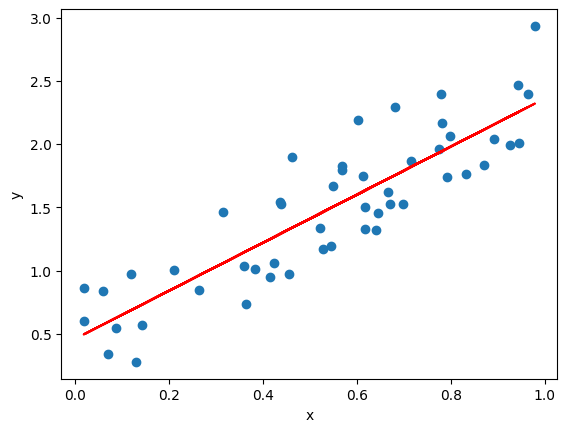

In [8]:
def brute_force_lin_reg(x, y):
    slope = 0
    intercept = 0
    min_error = np.inf

    for i in np.arange(0, 2, 0.01):  # slope
        for j in np.arange(0, 1, 0.01):  # intercept
            y_pred = i * x + j
            error = rss(y, y_pred)
            if error < min_error:
                min_error = error
                slope = i
                intercept = j
    return slope, intercept


slope, intercept = brute_force_lin_reg(x, y)
print(f"Brute force: slope: {slope}, intercept: {intercept}")
plot_lin_reg(x, y, slope, intercept)
